In [1]:
import numpy as np
from pathlib import Path
import struct
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import time

In [2]:
dataset_path = Path("./MNIST")
train_img_path = dataset_path/'train-images-idx3-ubyte'
train_lab_path = dataset_path/'train-labels-idx1-ubyte'
test_img_path = dataset_path/'t10k-images-idx3-ubyte'
test_lab_path = dataset_path/'t10k-labels-idx1-ubyte'

In [3]:
with open(train_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    tmp_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
    train_img = tmp_img[:]
with open(test_img_path, "rb") as f:
    struct.unpack(">4i", f.read(16))
    test_img = np.fromfile(f, dtype=np.uint8).reshape(-1, 28*28)/255
with open(train_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    tmp_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
    train_lab = tmp_lab[:]
with open(test_lab_path, "rb") as f:
    struct.unpack(">2i", f.read(8))
    test_lab = np.fromfile(f, dtype=np.uint8).reshape(-1, 1)
# len(train_img)

In [4]:
# FUNCTION: show_image(index)
def show_image(img, index):
    plt.imshow(img[index].reshape(28, 28), cmap='gray')
    plt.pause(1)
    # print("label: {}".format(label[index]))
    return 0
# show_image(train_img, train_lab, 30)
# len(train_lab[np.where(train_lab == 9)])

In [5]:
train_num = train_img.shape[0]
test_num = test_img.shape[0]
print(train_img.shape)
print(test_img.shape)
print(train_lab.shape)
train_lab

(60000, 784)
(10000, 784)
(60000, 1)


array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

### <font color="red"> 警示 </font>：
这里创建训练集合，需要对自己指定的数字，比如数字0，和其他数字进行整体的重新建立。并重新赋予图像标签（手写数字为0的标签为1，表示是数字0；其他手写数字标签为0，表示图片上的数字不是0）
也就是讲label转成，数字0对应label设置为1，表示为数字0；其他数字对应label改为0，表示不是数字0

(array([0, 0, 0, ..., 0, 0, 0]), array([    7,    10,    12, ..., 59978, 59980, 59996]))
train set shape: (784, 60000)
train lab shape: (1, 60000)
test set shape: (784, 10000)
test lab shape: (1, 10000)


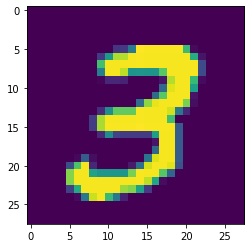

In [32]:
# 将给定num的label改为1
def train_setY(num):
    label = train_lab.copy()
    label[np.where(label != num)] = 10
    label[np.where(label == num)] = 1
    label[np.where(label == 10)] = 0
    return label
def test_setY(num):
    label = test_lab.copy()
    label[np.where(label != num)] = 9
    label[np.where(label == num)] = 1
    label[np.where(label == 9)] = 0
    return label
reg_num = 3
train_X = train_img.copy().T
train_Y = train_setY(reg_num).T
index_regnum = np.where(train_Y==1)
print(index_regnum)
test_X = test_img.copy().T
test_Y = test_setY(reg_num).T
print(f"train set shape: {train_X.shape}")
print(f"train lab shape: {train_Y.shape}")
print(f"test set shape: {test_X.shape}")
print(f"test lab shape: {test_Y.shape}")

# show_image(train_X.T, 1)
hw0 = train_X.T
i = index_regnum[1][0]
np.save(f'handwritten{reg_num}.npy', hw0[i])
plt.imshow(hw0[i].reshape((28,28)))

# # print(train_Y[30])
# print(train_Y.shape)
# # print(np.where(train_Y==1))
# tmp = train_lab.copy().T[:, :limit_train]
# len(tmp[np.where(tmp == reg_num)])
# 

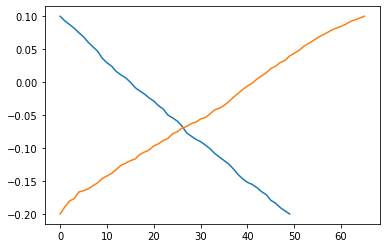

In [33]:
parameters = {
    'a+': 1e-2, 'b+': 27,
    'a-': 1e-2, 'b-': 27,
    'wmax': 1, 'wmin': 0
}
weight_plus_list = [parameters['wmin']]
weight_minus_list = [parameters['wmax']]

def weight_plus(w):
    delta_w = parameters['a+'] * np.exp(-parameters['b+']*(w-parameters['wmin'])
                                             /(parameters['wmax']-parameters['wmin']))
    return w+delta_w
def weight_minus(w):
    delta_w = parameters['a-'] * np.exp(-parameters['b-']*(parameters['wmax']-w)
                                             /(parameters['wmax']-parameters['wmin']))
    return w-delta_w
def equation():
    count_num = 0
    while True:
        weight_plus_list.append(weight_plus(weight_plus_list[-1]))
        weight_minus_list.append(weight_minus(weight_minus_list[-1]))
        count_num += 1
        if weight_plus_list[-1] >= 1:
            break
        elif count_num == 50:
            break
        else:
            continue

    wpl = [0.3*(each - weight_plus_list[0]) / (weight_plus_list[-1]-weight_plus_list[0])-0.2 for each in weight_plus_list]
    wml = [0.3*(each - weight_minus_list[-1]) / (weight_minus_list[0]-weight_minus_list[-1])-0.2 for each in weight_minus_list]
    
#     wpl = [(each - weight_plus_list[0]) / (weight_plus_list[-1]-weight_plus_list[0]) for each in weight_plus_list]
#     wml = [(each - weight_minus_list[-1]) / (weight_minus_list[0]-weight_minus_list[-1]) for each in weight_minus_list]
    
    return np.array(wpl), np.array(wml)
# GP, GD = equation()
# print(GP)
# print(GD)

GP_tmp = np.loadtxt("wangxin-GP.txt")
GD_tmp = np.loadtxt("wangxin-GD.txt")

GP = [0.3*(each-min(GP_tmp))/(max(GP_tmp)-min(GP_tmp))-0.2 for each in GP_tmp]
GD = [0.3*(each-min(GD_tmp))/(max(GD_tmp)-min(GD_tmp))-0.2 for each in GD_tmp]

# GP = [(each-min(GP_tmp))/(max(GP_tmp)-min(GP_tmp)) for each in GP_tmp]
# GD = [(each-min(GD_tmp))/(max(GD_tmp)-min(GD_tmp)) for each in GD_tmp]

plt.plot(GP)
plt.plot(GD)
plt.show()
# np.savetxt(f"GP {parameters['b+']}.txt", GP)
# np.savetxt(f"GD {parameters['b-']}.txt", GD)

In [34]:
def findGP_num(data, find_array=GP):
    diff = abs(data - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    # print(index)
    return find_array[index]

def findGD_num(data, find_array=GD):
    diff = abs(data - find_array)
    index = np.where(diff == np.min(diff))[0][0]
    return find_array[index]

def each_change(matrix_old, gradw):
    matrix_new = matrix_old.copy()
    for i in range(matrix_old.shape[0]):
        if gradw[i] < 0:
            matrix_new[i] = findGP_num(matrix_old[i])
        else:
            matrix_new[i] = findGD_num(matrix_old[i])
    return matrix_new
# tmp = np.zeros((10, 1))
# each_change(tmp, [0]*len(tmp))

In [105]:
# 激活函数
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-1.0*z))
    return s

# 参数初始化
def initialize_with_zeros(dim):
    w = (-1 + 2*np.random.random((dim, 1)))/10
    # w = np.zeros((dim, 1))
    b = 0
    
#     plt.imshow(w.reshape((28,28)))
#     plt.pause(1)
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    #######
    # w = each_change(w, [-1]*dim)
    #######
    
    return w, b

# 向前传播
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(1.0/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    dw = (1.0/m) * np.dot(X, (A-Y).T)
    db = (1.0/m) * np.sum(A-Y)

    Y_prediction = np.zeros((1, m))
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    accu = 100-np.mean(np.abs(Y_prediction-Y))*100
    
#     print(f"(A-Y).shape: {(A-Y).shape}")
#     print(f"X.shape: {X.shape}")
#     print(f"w.shape: {w.shape}")
#     print(f"dw.shape: {dw.shape}")
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw": dw,
        "db": db
    }
    
    return grads, cost, accu

# 参数优化
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    accus = []
    for i in range(num_iterations):
        grads, cost, accu = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        #######
        # w = each_change(w, [0]*len(w))
        #######

        if i%100 == 0:
            costs.append(cost)
        accus.append(accu)
            
#             print(f"w max:{np.max(w)}, w min:{np.min(w)}")
#             print(f"dw max:{np.max(dw)}, dw min:{np.min(dw)}")
#         if i == num_iterations/2 or i == num_iterations-1:
#             w_tmp = w.copy()
#             plt.imshow(w_tmp.reshape((28,28)))
#             plt.pause(1)
        if print_cost and i%100 == 0:
            print("Cost after iterations %i: %f" %(i, cost), end=' ')
            print(f"accu: {accus[-1]}%")
        
    params = {
        "w": w,
        "b": b
    }
    grads = {
        "dw": dw,
        "db": db
    }

    # return params, grads, costs
    return params, grads, accus

# 模型预测
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [106]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    # parameters, grads, costs= optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    parameters, grads, accus= optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {}%".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
    
    d = {
        "accus": accus,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }
    
    return d

In [108]:
# start = time.time()
print(f"Number {reg_num} Recognition:")
d = model(train_X, train_Y, test_X, test_Y, num_iterations=1000, learning_rate=0.5, print_cost=True)
# stop = time.time()
# print(f"{stop-start}s")

Number 3 Recognition:
Cost after iterations 0: 0.621929 accu: 68.34666666666666%
Cost after iterations 100: 0.109371 accu: 96.69333333333333%
Cost after iterations 200: 0.100116 accu: 96.94166666666666%
Cost after iterations 300: 0.095670 accu: 97.11666666666666%
Cost after iterations 400: 0.092837 accu: 97.22333333333333%
Cost after iterations 500: 0.090808 accu: 97.305%
Cost after iterations 600: 0.089258 accu: 97.32166666666667%
Cost after iterations 700: 0.088026 accu: 97.37333333333333%
Cost after iterations 800: 0.087018 accu: 97.41666666666667%
Cost after iterations 900: 0.086177 accu: 97.445%
train accuracy: 97.47166666666666%
test accuracy: 97.67%


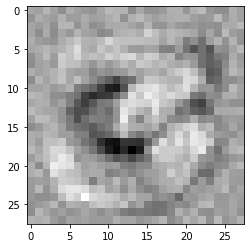

array([[ 8.42093454e-03, -1.22481179e-02,  7.81887518e-02,
         1.48221169e-03, -9.36623264e-02,  3.83245326e-02,
        -1.55536381e-02, -4.87927341e-02, -6.68937384e-02,
         8.47964891e-03,  9.39348284e-02,  6.48246866e-02,
         6.88471090e-02, -9.46014325e-02,  1.88590066e-02,
        -7.11496861e-02, -6.78196055e-02, -4.24033509e-02,
         5.27698541e-02,  5.15891859e-02, -5.74079557e-02,
         5.73929103e-02,  9.88606250e-02, -5.98129062e-02,
        -9.00112625e-02, -9.79194605e-02,  4.71844086e-02,
        -1.37759631e-02],
       [-6.83949214e-02,  3.31138004e-02, -4.03931283e-03,
        -2.89822168e-02,  5.76968771e-02, -2.72779179e-02,
        -3.04021921e-02,  3.08361919e-02, -1.95834435e-02,
         1.38863103e-04,  3.90830094e-02,  8.25053854e-02,
        -7.57997046e-02,  5.33264793e-02,  9.49489033e-02,
         2.26812007e-02, -2.15434640e-02,  1.90937104e-02,
         3.80368967e-02,  5.11461782e-02,  4.88383105e-02,
        -2.03668379e-02, -5.10

In [109]:
w = d["w"].copy()
# w[np.where(w>0.5)] = 0
plt.imshow(w.reshape((28,28)), cmap='gray')
plt.pause(0.1)
# np.save(f"w{reg_num}_qxs.npy", w)
# np.save(f"w{reg_num} {parameters['b+']}.npy", w)

w.reshape((28,28))

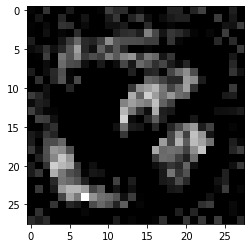

array([[8.42093454e-03, 0.00000000e+00, 7.81887518e-02, 1.48221169e-03,
        0.00000000e+00, 3.83245326e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.47964891e-03, 9.39348284e-02, 6.48246866e-02,
        6.88471090e-02, 0.00000000e+00, 1.88590066e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.27698541e-02, 5.15891859e-02,
        0.00000000e+00, 5.73929103e-02, 9.88606250e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.71844086e-02, 0.00000000e+00],
       [0.00000000e+00, 3.31138004e-02, 0.00000000e+00, 0.00000000e+00,
        5.76968771e-02, 0.00000000e+00, 0.00000000e+00, 3.08361919e-02,
        0.00000000e+00, 1.38863103e-04, 3.90830094e-02, 8.25053854e-02,
        0.00000000e+00, 5.33264793e-02, 9.49489033e-02, 2.26812007e-02,
        0.00000000e+00, 1.90937104e-02, 3.80368967e-02, 5.11461782e-02,
        4.88383105e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.96153089e-02, 0.00000000e+00, 3.52128958e-02, 0.00000

In [111]:
tmp = np.zeros((w.shape[0], 1))
# tmp.shape
index = np.where(w>0)
tmp[index] = w[index]
plt.imshow(tmp.reshape((28,28)), cmap='gray')
plt.pause(0.1)
tmp.reshape((28,28))

[[ 4.79052393e-01  7.77757978e-01  8.57438805e-01  5.33967912e-01
   8.72293769e-01  5.41442750e-02  3.59032036e-02  4.94260223e-01
   3.58791598e-01  7.32148410e-01  4.64753459e-01  4.26352323e-01
   2.71960249e-01  5.30935820e-01  1.35830748e-01  7.38238997e-01
   2.17498624e-01  1.10449667e-01  2.57972609e-02  6.61712152e-01
   5.34989613e-02  7.88967431e-01  9.81113241e-02  4.40885257e-01
   5.54675851e-01  8.87669090e-01  7.71644830e-02  9.16805898e-01]
 [ 6.95991363e-01  7.04757342e-01  2.78448484e-01  8.11290570e-01
   4.81562550e-01  1.28314137e-01  1.70845015e-01  5.48957165e-02
   1.12942715e-01  2.77820197e-01  8.19127013e-01  1.33546793e-01
   2.01149182e-01  8.97546805e-01  9.51738010e-01  1.60999668e-01
   9.71255683e-01  7.18393298e-01  9.33683746e-01  8.54728706e-01
   7.67517213e-01  5.62225533e-01  6.06659042e-01  8.24798963e-01
   4.04252640e-01  5.92220177e-01  4.28981681e-01  8.91122401e-01]
 [ 4.68885754e-01  8.43220299e-01  4.09545993e-01  5.92864977e-01
   3.492

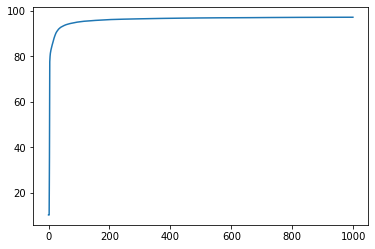

In [ ]:
print(w.reshape((28,28)))
accus = d["accus"].copy()
plt.plot(accus)
plt.ylim(20, 100)
# np.savetxt(f"accu{reg_num} {parameters['b+']}.txt", accus)
# np.savetxt(f"accu{reg_num}_qxs.txt", accus)